In [1]:
from __future__ import print_function, division
import time
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from six import iteritems
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

rcParams['figure.figsize'] = (39, 18)

from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore
from nilmtk.disaggregate import CombinatorialOptimisation, FHMM, hart_85, MLE
from nilmtk.metrics import f1_score

In [2]:
train = DataSet('fqpsenergy.h5')
test = DataSet('fqpsenergy.h5')

In [3]:
building = 1

In [4]:
train.set_window(end="2018-04-03 14:00:00")
test.set_window(start="2018-04-03 14:00:00")
train_elec = train.buildings[1].elec
test_elec = test.buildings[1].elec

physical_quantity          power         
type                      active reactive
(physical_quantity, type)                
2018-04-03 14:00:00+08:00    0.0      0.0
2018-04-03 14:00:01+08:00    0.0      1.0
2018-04-03 14:00:02+08:00    0.0      1.0
2018-04-03 14:00:03+08:00    0.0      0.0
2018-04-03 14:00:04+08:00    0.0      0.0

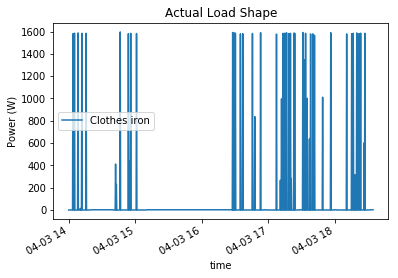

In [5]:
test_elec.select_using_appliances(type=['clothes iron']).plot()
plt.xlabel('time');
plt.title("Actual Load Shape");

next(test_elec['clothes iron'].load()).head()

physical_quantity          power         
type                      active reactive
(physical_quantity, type)                
2018-04-01 08:00:00+08:00    2.0     10.0
2018-04-01 08:00:01+08:00    2.0     10.0
2018-04-01 08:00:02+08:00    2.0     10.0
2018-04-01 08:00:03+08:00    2.0     10.0
2018-04-01 08:00:04+08:00    2.0     10.0

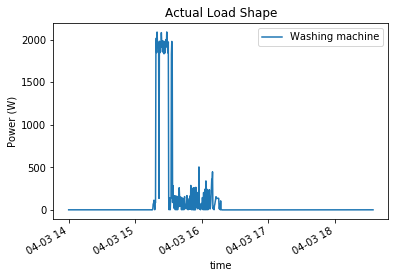

In [6]:
test_elec.select_using_appliances(type=['washing machine']).plot()
plt.xlabel('time');
plt.title("Actual Load Shape");

next(train_elec['washing machine'].load()).head()

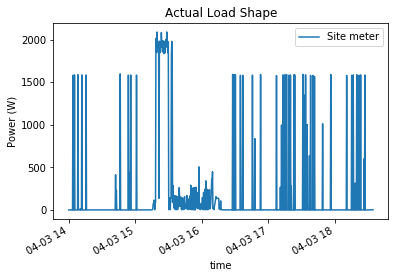

In [7]:
test_elec.mains().plot()
plt.xlabel('time');
plt.title("Actual Load Shape");

In [8]:
start = time.time()
hart = hart_85.Hart85()
hart.train(train_elec, sample_period=1, cols=[('power', 'active'), ('power', 'reactive')])
end = time.time()
print("Runtime =", end-start, "seconds.")

Loading data for meter ElecMeterID(instance=1, building=1, dataset='ALD')     

G:\Downloads\Program\nilmtk\nilmtk\metergroup.py:1768: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  cumulator_arr = cumulator.as_matrix()


Loading data for meter ElecMeterID(instance=13, building=1, dataset='ALD')     
Done loading data all meters for this chunk.
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
Runtime = 19.28349995613098 seconds.


In [9]:
disag_filename = 'harttest.h5'
output = HDFDataStore(disag_filename, 'w')
hart.disaggregate(test_elec.mains(), output, sample_period=1)
output.close()

Finding Edges, please wait ...


D:\Anaconda3\envs\nilmtk-env\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.


G:\Downloads\Program\nilmtk\nilmtk\disaggregate\hart_85.py:345: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  power[i] = self.centroids.ix[appliance].values
G:\Downloads\Program\nilmtk\nilmtk\disaggregate\hart_85.py:348: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  power[i] = self.centroids.ix[appliance].values


Exception: Data must be 1-dimensional